In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('loan.csv')

In [3]:
X = data.drop(columns=['Loan_Status','Loan_ID'])
y = data['Loan_Status']

In [4]:
X = X.fillna({'Gender':'NA','Married':'No','Dependents':'0','Self_Employed':'No',
             'LoanAmount':X['LoanAmount'].mean(),'Loan_Amount_Term':X['Loan_Amount_Term'].mean(),
             'Credit_History':0.0})

In [5]:
X = pd.get_dummies(X,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])

In [6]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_NA,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,0,1,...,0,1,0,1,0,1,0,0,0,1


## Overfitting

Modelo se ajusta demasiadamente aos dados utilizados para encontrar os parâmetros
- Underfit: geralmente equação linear; possui um erro alto
- Fit: geralmente uma equação quadrática; possui erro aceitavel 
- Overfit: geralmente equações com graus elevados; possui erro próximo de 0

### Generalização
Generalização é a capacidade de um algoritmo de fornecer boas predições para um dado ainda não visto.

#### Premissas
- Dados que não foram vistos se assemelham aos dados usados para treinamento
- Com isso, modelos ajustados para o treino ficarão bons para o teste

#### Overfitting
- Acontece quando um modelo complexo é ajustado em um conjunto de dados que não é suficientemente grande

## K-NN para Regressão

- Encontra-se os k vizinhos mais próximos
- 𝑦" é dado pela média dos valores de y dos k vizinhos mais próximos

## R2 score

- Mede o quão bem um modelo de regressão se ajustou aos dados
- Entre 0 e 1
  - 1 indica ajuste perfeito

## Scikit Learn

Python Machine Learning Library
- from sklearn.model_selection import train_test_split
- from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
# Pipeline faz todo o processamento de uma vez
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,stratify=y)

In [9]:
# Colunas com dados categóricos não fazem sentido usar o MinMaxScaler, porquê não possuem peso ou ordem em seus números
# O MinMaxScaler pressupõe uma ordem 
# O K-NN tb não pode ser usado com dados categóricos, pq ele é baseado em distâncias 

# Criando um transformador de colunas passando apenas as var. numéricas
# remainder='passthrough' -> Mantém as colunas mensionadas. Ignora as outras colunas
ct = ColumnTransformer([('min_max',MinMaxScaler(),['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])],remainder='passthrough')
# Criando o pipeline de nome: "transformacao"
# O pipeline vai chamar o transformador de colunas e aplicar o 'model' do tipo KNeighborsClassifier com 5 vizinhos
pipeline = Pipeline([('transformacao',ct),('model',KNeighborsClassifier(n_neighbors=5))])

In [10]:
# fit-transform (transforma em escala 0-1) no ct e depois no modelo
pipeline.fit(X_train,y_train)
# 
pipeline.score(X_test,y_test)

0.6178861788617886

In [11]:
acc_train = []
acc_test = []
for k in range(1,21): 
    pipeline = Pipeline([('transformacao',ct),('model',KNeighborsClassifier(n_neighbors=k))])
    pipeline.fit(X_train,y_train)
    acc_train.append(pipeline.score(X_train,y_train))
    acc_test.append(pipeline.score(X_test,y_test))

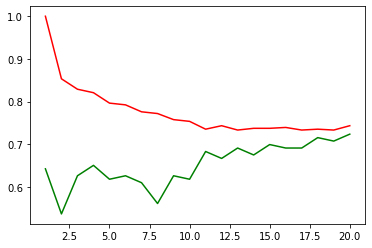

In [12]:
# Plotando os scores de treino e teste pelo k[1 - 21]
# Melhor modelo é o de 8 vizinhos
import matplotlib.pyplot as plt
plt.plot(range(1,21),acc_train,'r-')
plt.plot(range(1,21),acc_test,'g-')
plt.show()

In [13]:
# O 8a elemento
acc_test[7] 

0.5609756097560976

# Modelos lineares para regressão 

## Regressão Linear/Logística

Explicar uma determinada variável de saída (y) através de variáveis de entrada (x), utilizando um modelo linear.

- Exemplo: Concessão de crédito
  - Encontrar uma relação linear entre Salário e Credito
  - Salário (xi) e Crédito (yi)
  - 𝑦i = 𝑤1*𝑥i + 𝑤2
  
### Estimação dos Parâmetros
- w1 e w0 são estimados a partir dos dados de treinamento
- Existem muitos métodos para este ajuste
  - Minimizar uma função de perda (loss function)
  
### Regressão Linear Multivariada
- Em diversos problemas é necessário utilizar mais de uma variável x para tentar explicar a variável de saída y
- Exemplo: Concessão de crédito
  - Encontrar uma relação linear entre Salário,Dívida e Credito
  - Salário (x1i), Salário (x2i) e Crédito (yi)
  - 𝑦i = 𝑤1*𝑥1 + 𝑤2*x2 + 𝑤0

In [14]:
# Função logística: os resultados variam entre 0 e 1 para dar uma classificação
# Cria uma função parecido com uma integral
# Função simples para 2 classes
# Para > 2 classes: usa a técnica ONExALL
###### Se 50 classes, separa em 2 classes com 49 x 1. 
###### Verifica de o classificador dá o melhor resultado neste 1. 
###### E faz isso para os demais 49. 
def func_logistica(x):
    return(1/(1+(2.7)**(-x)))

In [15]:
func_logistica(-1)

0.27027027027027023

In [16]:
func_logistica(1)

0.7297297297297298

In [17]:
func_logistica(3)

0.951651114441812

In [18]:
func_logistica(-100)

7.305056581147772e-44

Exercício -> rodar a regressão logística pros mesmos dados de ontem e comparar a execução com e sem normalizar os atributos

In [19]:
from sklearn.linear_model import LogisticRegression

# Criando um transformador de colunas passando apenas as var. numéricas
# remainder='passthrough' -> Mantém as colunas mensionadas. Ignora as outras colunas
# MinMaxScaler normaliza os dados
ct = ColumnTransformer([('min_max',MinMaxScaler(),['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])],remainder='passthrough')

# Criando o pipeline de nome: "transformacao"
# O pipeline vai chamar o transformador de colunas e aplicar o 'model' do tipo LogisticRegression
pipeline = Pipeline([('transformacao',ct),('model',LogisticRegression())])

In [20]:
# fit-transform (transforma em escala 0-1) no ct e depois no modelo
pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformacao',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('min_max', MinMaxScaler(),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term'])])),
                ('model', LogisticRegression())])

In [21]:
pipeline.score(X_test,y_test)

0.7154471544715447

In [22]:
# Aplicando a Regressão Logística sem normalizar os dados
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6910569105691057

### Regressão com Regularização L2

#### Regressão Ridge: 
- É uma regressão linear, quando o λ == 0
- Penaliza a utilização dos pesos
- Modelos mais simples
- Menos suscetível a overfitting

### Normalização dos dados
- Importante que os atributos estejam na mesma escala
  - K-NN, regressão regularizada
- Normalizações
  - Min-Max
  - Standardization
  
#### Min-Max  
```console
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
```
- Mesma normalização para treino e teste
  - Não usar dados de teste
- Não normalizar as saídas

#### Standardization
```
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_test)
```
- Dados com média 0 e variância 1 

In [23]:
import numpy as np
acc_train = []
acc_test = []
# np.arange(0.1,1.1,0.1)
### Valor inicial: 0.1
### Valor final: 1.1
### Variação: 0.1
for c in np.arange(0.1,1.1,0.1): 
    # Aplicando a regressão logística, onde:
    #### λ(C) = arange(0.1,1.1,0.1)
    #### penalty = l2
    pipeline = Pipeline([('transformacao',ct),('model',LogisticRegression(penalty='l2',C=c))])
    pipeline.fit(X_train,y_train)
    acc_train.append(pipeline.score(X_train,y_train))
    acc_test.append(pipeline.score(X_test,y_test))

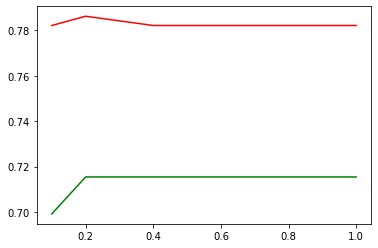

In [24]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0.1,1.1,0.1),acc_train,'r-')
plt.plot(np.arange(0.1,1.1,0.1),acc_test,'g-')
plt.show()

In [25]:
acc_test

[0.6991869918699187,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447,
 0.7154471544715447]

In [26]:
pipeline.get_params()

{'memory': None,
 'steps': [('transformacao',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('min_max', MinMaxScaler(),
                                    ['ApplicantIncome', 'CoapplicantIncome',
                                     'LoanAmount', 'Loan_Amount_Term'])])),
  ('model', LogisticRegression())],
 'verbose': False,
 'transformacao': ColumnTransformer(remainder='passthrough',
                   transformers=[('min_max', MinMaxScaler(),
                                  ['ApplicantIncome', 'CoapplicantIncome',
                                   'LoanAmount', 'Loan_Amount_Term'])]),
 'model': LogisticRegression(),
 'transformacao__n_jobs': None,
 'transformacao__remainder': 'passthrough',
 'transformacao__sparse_threshold': 0.3,
 'transformacao__transformer_weights': None,
 'transformacao__transformers': [('min_max',
   MinMaxScaler(),
   ['ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'])],
 'transformacao_

In [27]:
pipeline.get_params()['model']

LogisticRegression()

In [28]:
pipeline.get_params()['model'].coef_

array([[ 0.1222673 , -0.65154714, -0.20448637, -0.27780572,  2.18277715,
         0.06012354,  0.12752012, -0.18794234, -0.22777961,  0.22748091,
         0.08146145, -0.06645368,  0.24392467, -0.25923113,  0.08543774,
        -0.08573643,  0.12458638, -0.12488507, -0.31734514,  0.37644642,
        -0.05939997]])

In [29]:
lr = LogisticRegression(C=0.3)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7154471544715447

In [30]:
# coef_ são os pesos aplicados em cada regressão
lr.coef_

array([[-2.41318683e-06, -6.42940798e-05, -4.77388195e-04,
        -2.75966721e-03,  1.82179166e+00, -4.77743437e-03,
         1.17660376e-01, -3.85020505e-02, -1.01049940e-01,
         1.75430832e-01,  9.32888419e-02, -9.59244359e-02,
         2.13053522e-01, -1.36037037e-01,  2.03554101e-01,
        -1.29173210e-01,  1.51746847e-01, -7.73659563e-02,
        -2.86247851e-01,  4.45061210e-01, -8.44324667e-02]])

In [31]:
pipeline = Pipeline([('transformacao',ct),('model',LogisticRegression(penalty='l2',C=0.3))])
pipeline.fit(X_train,y_train)
pipeline.score(X_test,y_test)

0.7154471544715447

#### Regressão com Regularização L1

##### Regressão Lasso: 
- No lugar do peso, pega o módulo, ou seja, a intencidade do peso
- Cria um modelo esparsos, com seleção de atributos

In [32]:
# list comprehension
y_train = [1 if x == 'Y' else 0 for x in y_train]
y_train

[1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,


In [33]:
y_test = [1 if x == 'Y' else 0 for x in y_test]
y_test

[1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0]

In [34]:
# ('transformacao',ct) -> normalizando 
pipeline = Pipeline([('transformacao',ct),('model',LogisticRegression(penalty='l1',solver='saga',C=0.3))])
pipeline.fit(X_train,y_train)
print(pipeline.score(X_test,y_test))
pipeline.get_params()['model'].coef_

0.7154471544715447


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  2.13049725,
         0.        ,  0.        ,  0.        , -0.16604088,  0.10183456,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.16665691,  0.30019184,
         0.        ]])

In [35]:
from sklearn.preprocessing import PolynomialFeatures
acc_train = []
acc_test = []
for d in range(1,6):
    # Transformação é o minmax
    # Transformação polinomial
    #### d -> grau do polinômio 
    # Roda o modelo de regressão logística 
    pipeline = Pipeline([('minmax',ct),
                         ('poly',PolynomialFeatures(degree=d)),
                         ('model',LogisticRegression(max_iter=1000))])
    pipeline.fit(X_train,y_train)
    acc_train.append(pipeline.score(X_train,y_train))
    acc_test.append(pipeline.score(X_test,y_test))

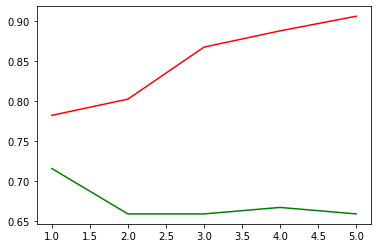

In [36]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),acc_train,'r-')
plt.plot(range(1,6),acc_test,'g-')
plt.show()